# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

## Exploratory Data Analysis

In [2]:
train=ImageDataGenerator()

In [3]:
import pandas as pd
import os
img_data = pd.DataFrame(columns=['path','class'])
img_list=[]
class_list=[]
for root, dirs, files in os.walk(r"J:\Machine Learning\Assignment 2\trafficsigns_dataset", topdown=False):
    for name in files:
        x = str(os.path.join(root,name))
        img_list.append(x)
        
        if 'diamond' in x :
            class_list.append(0)
        elif 'hex' in x :
            class_list.append(1)
        elif 'round' in x :
            class_list.append(2)
        elif 'square' in x :
            class_list.append(3)
        else :
            class_list.append(4)


img_data['path'] = img_list
img_data['class'] =class_list
img_data.to_csv('train.csv')

In [4]:
train_data = pd.read_csv('train.csv')

In [5]:
train_data['class'] = train_data['class'].astype(str)

In [6]:
train_data.head()

Unnamed: 0                                               path class
0           0  J:\Machine Learning\Assignment 2\trafficsigns_...     0
1           1  J:\Machine Learning\Assignment 2\trafficsigns_...     0
2           2  J:\Machine Learning\Assignment 2\trafficsigns_...     0
3           3  J:\Machine Learning\Assignment 2\trafficsigns_...     0
4           4  J:\Machine Learning\Assignment 2\trafficsigns_...     0

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3704 non-null   int64 
 1   path        3704 non-null   object
 2   class       3704 non-null   object
dtypes: int64(1), object(2)
memory usage: 86.9+ KB


In [8]:
image_disp = cv2.imread("./trafficsigns_dataset/square/parking/00011_00002.png", 0)
plt.imshow(image_disp)

<AxesSubplot:>

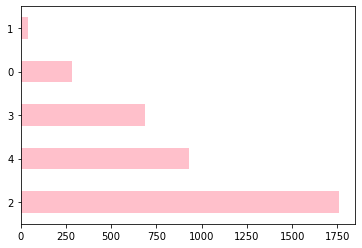

In [9]:
train_data['class'].value_counts().plot(kind='barh', color='pink')

In [10]:
df_data = train.flow_from_dataframe(
dataframe=train_data,
x_col="path",
y_col="class",
target_size=(28, 28),
color_mode="grayscale",
batch_size=5,
class_mode='categorical')

Found 3699 validated image filenames belonging to 5 classes.


C:\Users\Arjun\anaconda3\lib\site-packages\keras\preprocessing\image.py:989: UserWarning: Found 5 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


## Modelling

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
img_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (1, 1), activation = 'relu')(img_inputs)
x = layers.MaxPool2D(2,2)(x)
x = layers.Conv2D(16, (2, 2), activation = 'relu')(img_inputs)
x = layers.MaxPool2D(2,2)(x)
x = layers.Flatten()(x)

output = layers.Dense(5,activation = 'softmax')(x)
model = keras.Model(inputs=img_inputs, outputs=output, name="model")

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 5)                 13525     
                                                                 
Total params: 13,605
Trainable params: 13,605
Non-trainable params: 0
_________________________________________________________

In [13]:
model.compile(loss='categorical_crossentropy', 
             optimizer= tf.keras.optimizers.RMSprop(lr=0.001), 
             metrics=['accuracy'])

C:\Users\Arjun\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [14]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./{epoch:02d}-{accuracy:.2f}.hdf5',
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)
model.fit(df_data, steps_per_epoch=116 , epochs=50,callbacks=model_checkpoint_callback)

Epoch 1/50
116/116 [==============================] - 1s 4ms/step - loss: 7.9543 - accuracy: 0.6448
Epoch 2/50
116/116 [==============================] - 0s 4ms/step - loss: 1.2268 - accuracy: 0.8759
Epoch 3/50
116/116 [==============================] - 1s 4ms/step - loss: 0.5606 - accuracy: 0.9431
Epoch 4/50
116/116 [==============================] - 1s 5ms/step - loss: 0.3810 - accuracy: 0.9483
Epoch 5/50
116/116 [==============================] - 0s 4ms/step - loss: 0.2217 - accuracy: 0.9621
Epoch 6/50
116/116 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.9724
Epoch 7/50
116/116 [==============================] - 0s 4ms/step - loss: 0.1885 - accuracy: 0.9707
Epoch 8/50
116/116 [==============================] - 0s 3ms/step - loss: 0.1625 - accuracy: 0.9759
Epoch 9/50
116/116 [==============================] - 1s 5ms/step - loss: 0.0708 - accuracy: 0.9810
Epoch 10/50
116/116 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9845

## Predicting Shapes of Traffic Signs

In [15]:
path = r"J:\Machine Learning\Assignment 2\Test"

import pandas as pd
import os
img_data = pd.DataFrame(columns=['path','class'])
img_list=[]
class_list=[]
for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
        x = str(os.path.join(root,name))
        img_list.append(x)
        
        if 'diamond' in x :
            class_list.append(0)
        elif 'hex' in x :
            class_list.append(1)
        elif 'round' in x :
            class_list.append(2)
        elif 'square' in x :
            class_list.append(3)
        else :
            class_list.append(4)


img_data['path'] = img_list
img_data['class'] =class_list
img_data.to_csv('test.csv')

data=pd.read_csv('test.csv')
data['class'] = data['class'].astype(str)
data.to_csv('test.csv', index=False)

In [16]:
################## TEST ###########################

In [17]:
setIP=[]
test_set = pd.read_csv('test.csv')
for i in test_set['path']:
    t1= cv2.imread(i, 0)
    t1=cv2.resize(t1, (28,28))
    input_array = tf.keras.preprocessing.image.img_to_array(t1)
    ipp=np.argmax(model.predict(input_array.reshape(1,28,28,1)))
    setIP.append(ipp)
    

1/1 [==============================] - 0s 19ms/step


In [18]:
len(setIP)

25

In [19]:
test_set['predictions for shape']=setIP

In [20]:
test_set.to_csv('test1.csv', index=False)

In [21]:
##################################################

In [22]:
model.save('ClassifyShape.h5')

In [23]:
model.evaluate(df_data)

740/740 [==============================] - 3s 4ms/step - loss: 0.0032 - accuracy: 0.9984


[0.003174037206918001, 0.9983779191970825]

## Classifying Type of Signs 

In [24]:
import pandas as pd 
import os

img_data = pd.DataFrame(columns=['path','class'])

img_list=[]
class_list=[]
for root, dirs, files in os.walk(r"J:\Machine Learning\Assignment 2\trafficsigns_dataset", topdown=False):
    

    for name in files:
        
        x = str(os.path.join(root,name))
        img_list.append(x)
        
        
        if 'rightofway' in x:
            class_list.append(0)
        elif 'stop' in x :
            class_list.append(1)
        elif 'bicycle' in x :
            class_list.append(2)
        elif 'limitedtraffic' in x :
            class_list.append(3)
        elif 'noentry' in x :
            class_list.append(4)
        elif 'noparking' in x :
            class_list.append(5)
        elif 'roundabout' in x :
            class_list.append(6)
        elif 'speed' in x :
            class_list.append(7)
        elif 'trafficdirective' in x :
            class_list.append(8)
        elif 'traveldirection' in x :
            class_list.append(9)
        elif 'continue' in x :
            class_list.append(10)
        elif 'crossing' in x :
            class_list.append(11)
        elif 'laneend' in x :
            class_list.append(12)
        elif 'parking' in x :
            class_list.append(13)
        elif 'giveway' in x :
            class_list.append(14)
        else :
            class_list.append(15)
            

img_data['path'] = img_list
img_data['class'] =class_list
img_data.to_csv('train_sign.csv')

In [25]:
train_type_data = pd.read_csv('train_sign.csv')

In [26]:
train_type_data.head()

Unnamed: 0                                               path  class
0           0  J:\Machine Learning\Assignment 2\trafficsigns_...      0
1           1  J:\Machine Learning\Assignment 2\trafficsigns_...      0
2           2  J:\Machine Learning\Assignment 2\trafficsigns_...      0
3           3  J:\Machine Learning\Assignment 2\trafficsigns_...      0
4           4  J:\Machine Learning\Assignment 2\trafficsigns_...      0

In [27]:
train_type_data['class'] = train_type_data['class'].astype(str)

In [28]:
df_type_data = train.flow_from_dataframe(
dataframe=train_type_data,
x_col="path",
y_col="class",
target_size=(28, 28),
color_mode="grayscale",
batch_size=16,
class_mode='categorical')

Found 3699 validated image filenames belonging to 16 classes.


C:\Users\Arjun\anaconda3\lib\site-packages\keras\preprocessing\image.py:989: UserWarning: Found 5 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [29]:
from tensorflow import keras
from tensorflow.keras import layers
ip = keras.Input(shape=(28, 28, 1))
h = layers.Conv2D(16, (1, 1), activation = 'relu')(ip)
h = layers.MaxPool2D(2,2)(h)
h = layers.Conv2D(16, (2, 2), activation = 'relu')(ip)
h = layers.MaxPool2D(2,2)(h)
h = layers.Conv2D(32, (1, 1), activation = 'relu')(ip)
h = layers.MaxPool2D(2,2)(h)
h = layers.Conv2D(32, (2, 2), activation = 'relu')(ip)
h = layers.MaxPool2D(2,2)(h)
h = layers.Flatten()(h)

op = layers.Dense(16,activation = 'softmax')(h)
model2 = keras.Model(inputs=ip, outputs=op, name="model2")

In [30]:
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 16)                86544     
                                                                 
Total params: 86,704
Trainable params: 86,704
Non-trainable params: 0
________________________________________________________

In [31]:
model2.compile(loss='categorical_crossentropy', 
             optimizer= tf.keras.optimizers.RMSprop(lr=0.001), 
             metrics=['accuracy'])

C:\Users\Arjun\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [32]:
model2.fit(df_type_data, steps_per_epoch= 231, epochs=50)

Epoch 1/50
231/231 [==============================] - 2s 9ms/step - loss: 18.5555 - accuracy: 0.7097
Epoch 2/50
231/231 [==============================] - 2s 8ms/step - loss: 0.2635 - accuracy: 0.9669
Epoch 3/50
231/231 [==============================] - 2s 9ms/step - loss: 0.0952 - accuracy: 0.9864
Epoch 4/50
231/231 [==============================] - 2s 7ms/step - loss: 0.0416 - accuracy: 0.9929
Epoch 5/50
231/231 [==============================] - 2s 7ms/step - loss: 0.0380 - accuracy: 0.9951
Epoch 6/50
231/231 [==============================] - 2s 8ms/step - loss: 0.0192 - accuracy: 0.9967
Epoch 7/50
231/231 [==============================] - 3s 12ms/step - loss: 0.0202 - accuracy: 0.9965
Epoch 8/50
231/231 [==============================] - 2s 11ms/step - loss: 0.0225 - accuracy: 0.9984
Epoch 9/50
231/231 [==============================] - 2s 9ms/step - loss: 0.0094 - accuracy: 0.9986
Epoch 10/50
231/231 [==============================] - 2s 9ms/step - loss: 0.0049 - accuracy: 0.9

In [33]:
model2.save('ClassifyType.h5')

In [34]:
model2.evaluate(df_type_data)

232/232 [==============================] - 2s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [35]:
##################################### TEST ####################################

In [36]:
t1 = cv2.imread("./Test/hex/stop/00014_00004_00017.png", 0)
t1 = cv2.resize(t1, (28,28))
input_array = tf.keras.preprocessing.image.img_to_array(t1)
plt.imshow(t1)
print(np.argmax(model2.predict(input_array.reshape(1,28,28,1))))
print("prediction: ")

1/1 [==============================] - 0s 37ms/step
1
prediction: 


In [37]:
t1 = cv2.imread("./Test/round/noentry/00017_00004_00017.png", 0)
t1 = cv2.resize(t1, (28,28))
input_array = tf.keras.preprocessing.image.img_to_array(t1)
plt.imshow(t1)
print(np.argmax(model2.predict(input_array.reshape(1,28,28,1))))
print("prediction: ")

1/1 [==============================] - 0s 20ms/step
11
prediction: 
